<a href="https://colab.research.google.com/github/Lavan1999/Project-10_SingaporeResaleFlatPrediction/blob/main/SingaporeResalePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project6-Singapore/Project6-Singapore/ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Project6-Singapore/Project6-Singapore/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv("/content/drive/MyDrive/Project6-Singapore/Project6-Singapore/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Project6-Singapore/Project6-Singapore/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Project6-Singapore/Project6-Singapore/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [ ]:
# Appending all dataframes
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
924442,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months
924443,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months
924444,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
924445,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


# **Data Cleaning**

In [ ]:
df.shape

(924447, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924447 entries, 0 to 924446
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                924447 non-null  object 
 1   town                 924447 non-null  object 
 2   flat_type            924447 non-null  object 
 3   block                924447 non-null  object 
 4   street_name          924447 non-null  object 
 5   storey_range         924447 non-null  object 
 6   floor_area_sqm       924447 non-null  float64
 7   flat_model           924447 non-null  object 
 8   lease_commence_date  924447 non-null  int64  
 9   resale_price         924447 non-null  float64
 10  remaining_lease      215397 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.6+ MB


In [ ]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
df.duplicated().sum()

1895

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
# Assuming 'df' is your DataFrame
df.drop('remaining_lease', axis=1, inplace=True)

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0


In [ ]:
# Splitting the 'date' column into separate columns for year, month, and day
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

In [ ]:
df.shape

(922552, 11)

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990


In [ ]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
df.flat_model.unique(),len(df.flat_model.unique())

(array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
        'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
        'Maisonette', 'Multi Generation', 'Adjoined flat',
        'Premium Apartment', 'Terrace', 'Improved-Maisonette',
        'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
        'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object),
 34)

In [ ]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# Assuming df is your DataFrame and column_name is the name of the column
df['flat_model'] = df['flat_model'].str.upper()
df.flat_model.unique(),

(array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
        'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
        '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
        'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
        'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
        '3GEN'], dtype=object),)

In [ ]:
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [ ]:
df['flat_type'] = df['flat_type'].replace({'MULTI-GENERATION': 'MULTI GENERATION'})

In [ ]:
df.floor_area_sqm.min(), df.floor_area_sqm.max()

(28.0, 307.0)

In [ ]:
sorted(df.storey_range.unique())

['01 TO 03',
 '01 TO 05',
 '04 TO 06',
 '06 TO 10',
 '07 TO 09',
 '10 TO 12',
 '11 TO 15',
 '13 TO 15',
 '16 TO 18',
 '16 TO 20',
 '19 TO 21',
 '21 TO 25',
 '22 TO 24',
 '25 TO 27',
 '26 TO 30',
 '28 TO 30',
 '31 TO 33',
 '31 TO 35',
 '34 TO 36',
 '36 TO 40',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51']

In [ ]:
df.block.unique()

array(['309', '216', '211', ..., '606C', '605D', '606D'], dtype=object)

In [ ]:
df['storey_range'] = df['storey_range'].str.replace(' TO ', '-')

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04-06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07-09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04-06,73.0,NEW GENERATION,1976,47200.0,1990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922552 entries, 0 to 924446
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                922552 non-null  int64  
 1   town                 922552 non-null  object 
 2   flat_type            922552 non-null  object 
 3   block                922552 non-null  object 
 4   street_name          922552 non-null  object 
 5   storey_range         922552 non-null  object 
 6   floor_area_sqm       922552 non-null  float64
 7   flat_model           922552 non-null  object 
 8   lease_commence_date  922552 non-null  int64  
 9   resale_price         922552 non-null  float64
 10  year                 922552 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 84.5+ MB


In [ ]:
sorted(df.lease_commence_date.unique())


[1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2022]

In [ ]:
df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

# **Data Visualization**

In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

#col = ['month',	'floor_area_sqm','lease_commence_date',	'resale_price',	'year']
#sns.heatmap(df[col], annot=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

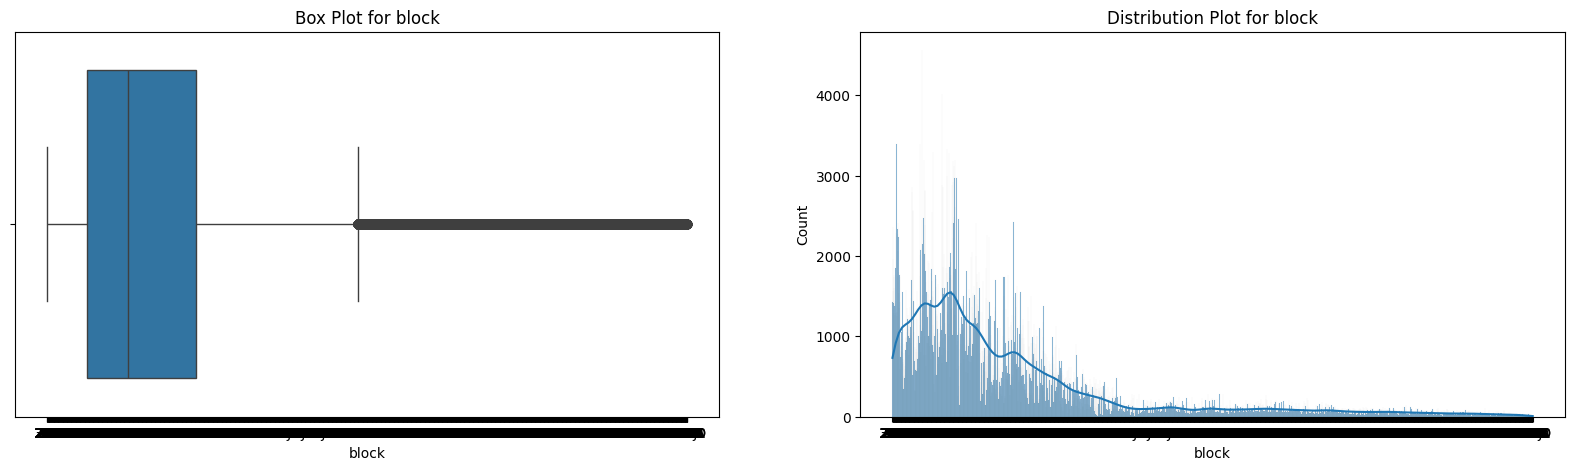

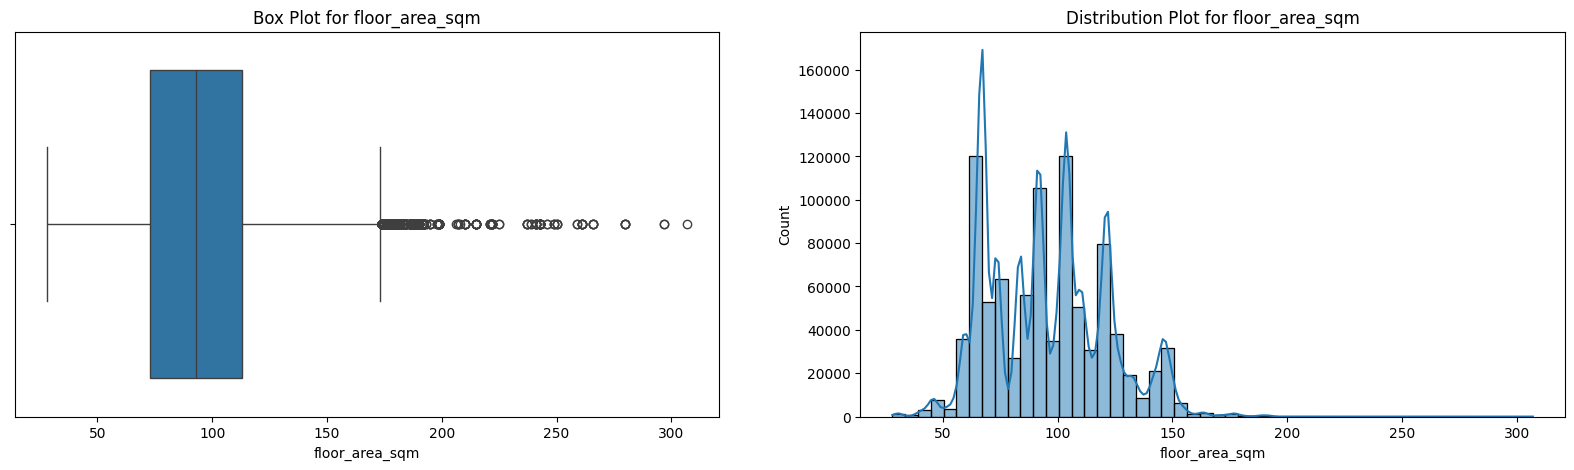

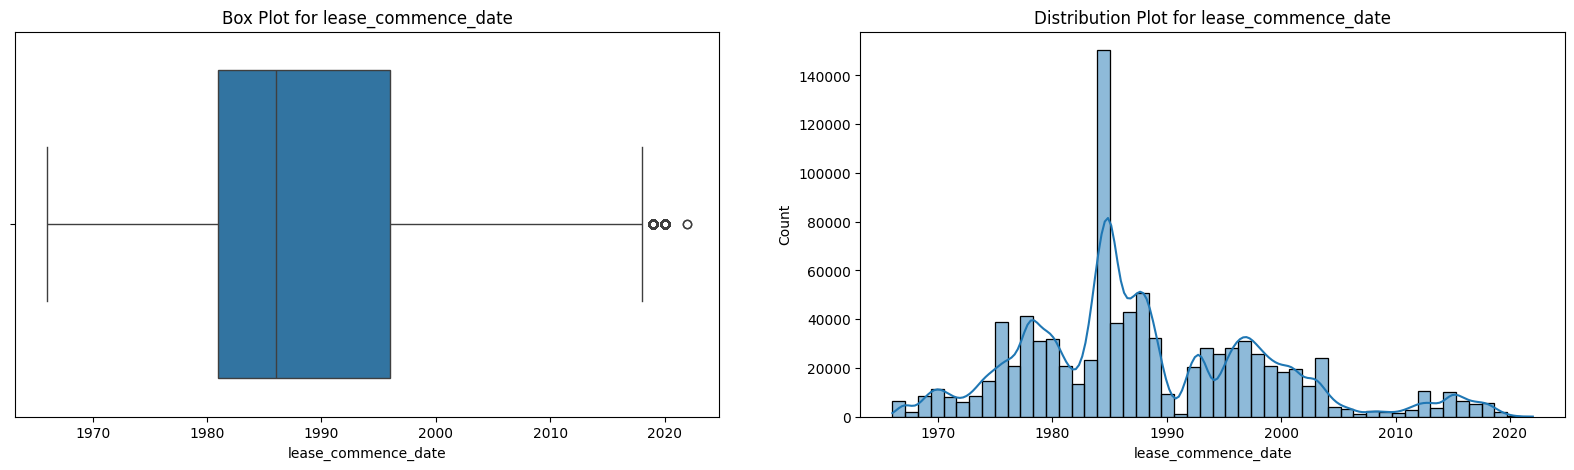

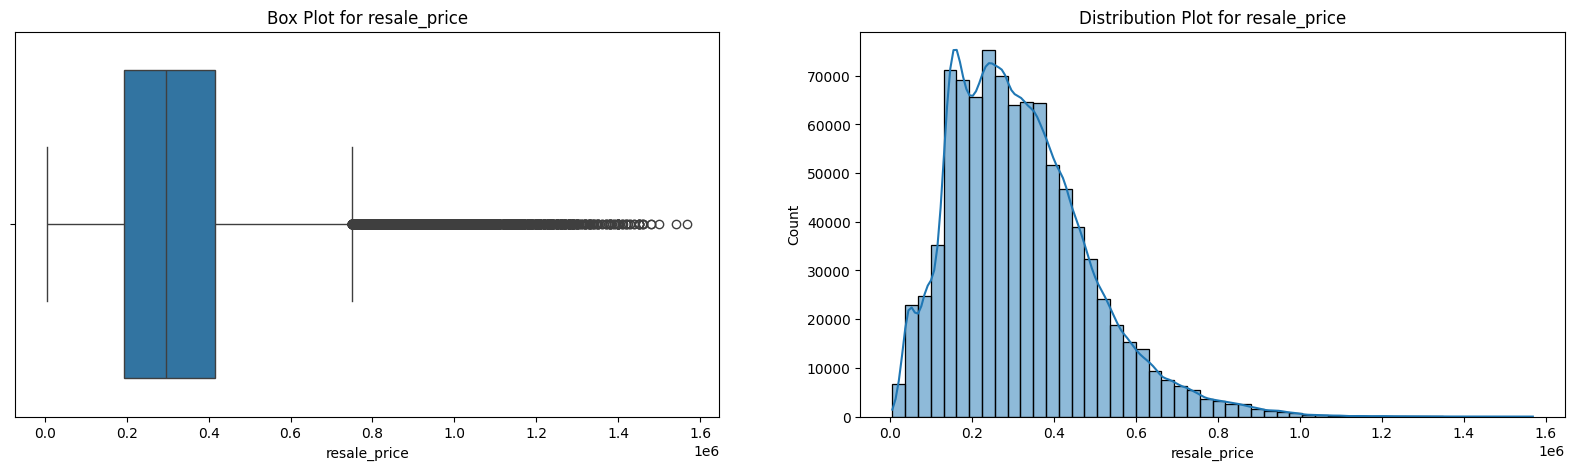

In [ ]:
for i in ['block', 'floor_area_sqm', 'lease_commence_date', 'resale_price']:
    plot(df, i)

In [ ]:
df.floor_area_sqm.describe()

count    922552.000000
mean         95.716837
std          25.827431
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         307.000000
Name: floor_area_sqm, dtype: float64

In [ ]:
df[df['floor_area_sqm'] >300]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
167243,8,KALLANG/WHAMPOA,3 ROOM,52,JLN BAHAGIA,01-03,307.0,TERRACE,1972,663388.0,1997


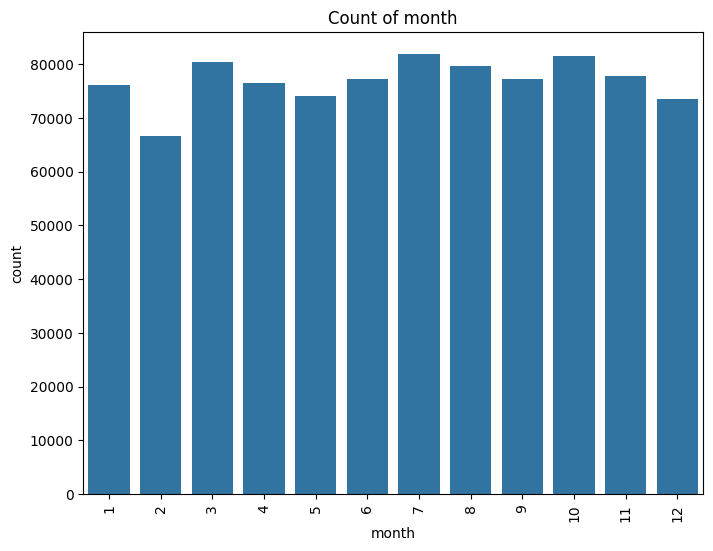

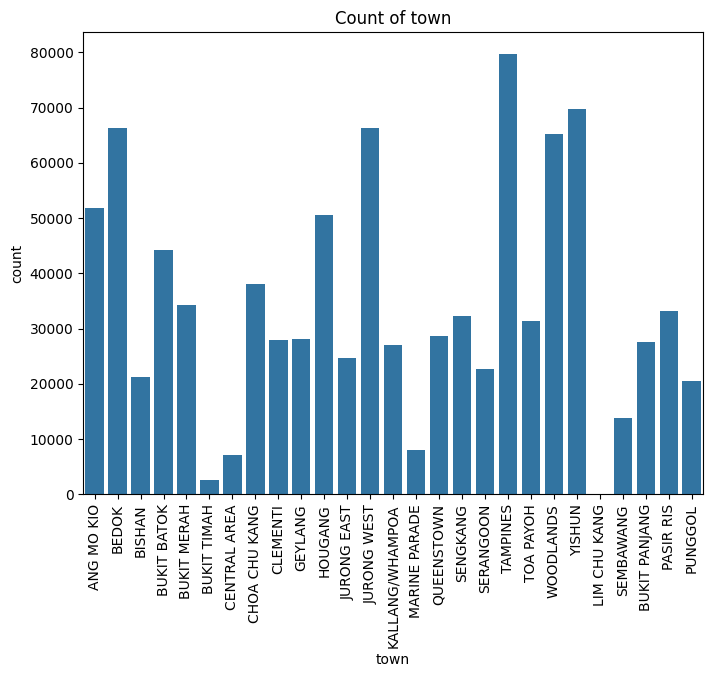

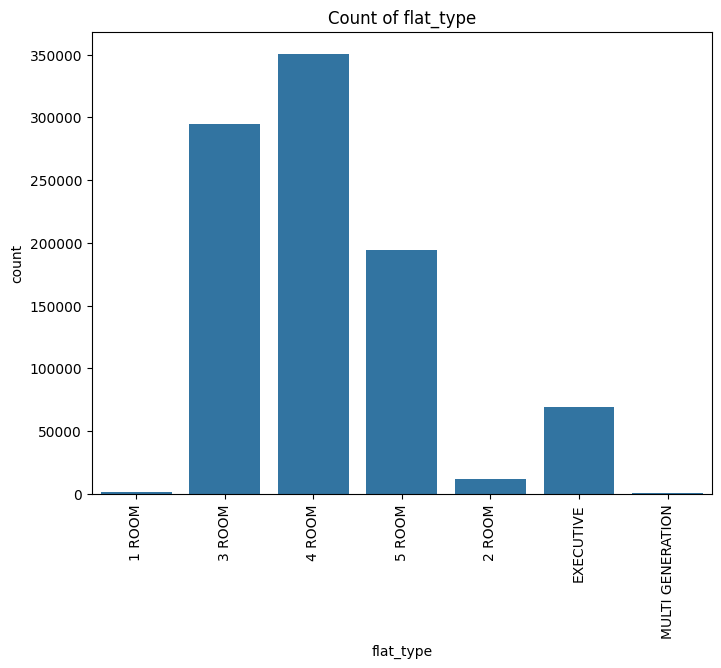

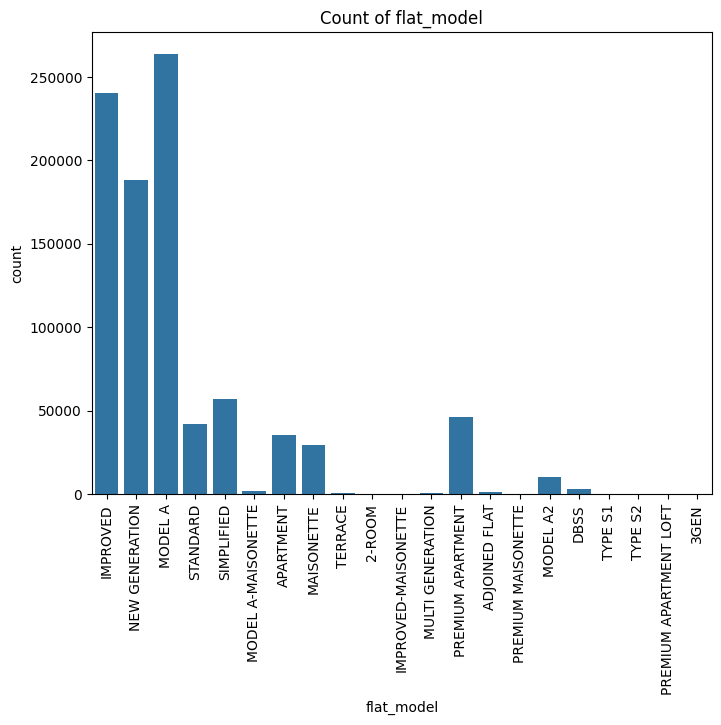

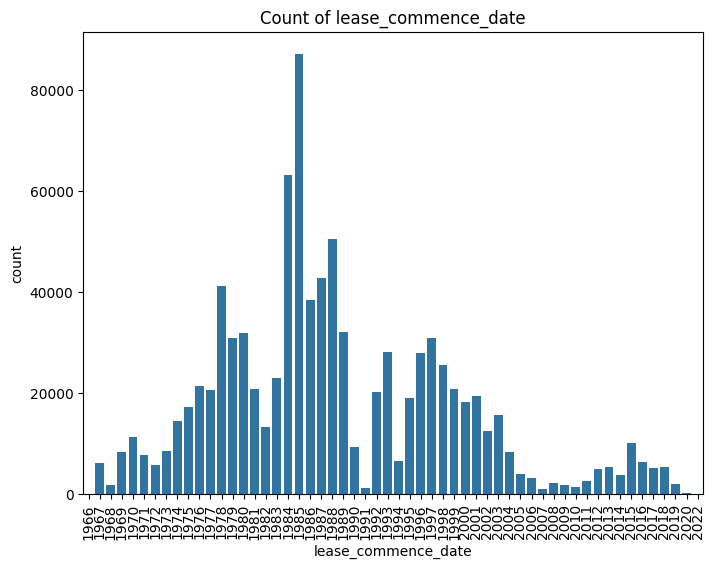

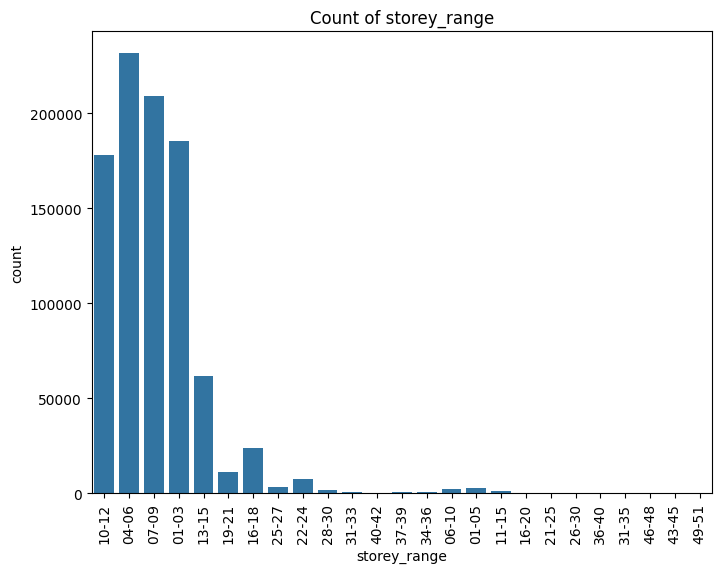

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['month','town',	'flat_type',	'flat_model',	'lease_commence_date','storey_range']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')
    plt.xticks(rotation=90)
    plt.show()

          flat_type  flat_model
0            1 ROOM           1
1            2 ROOM           6
2            3 ROOM           9
3            4 ROOM          12
4            5 ROOM          11
5         EXECUTIVE           5
6  MULTI GENERATION           1


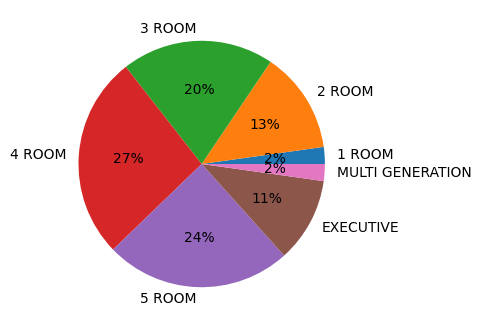

In [ ]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

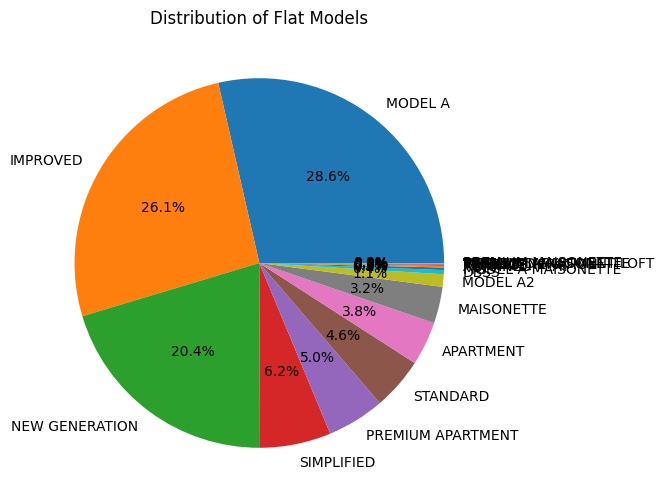

In [ ]:
# Pie Chart of Flat Models
plt.figure(figsize=(10, 6))
df['flat_model'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Flat Models')
plt.ylabel('')
plt.show()

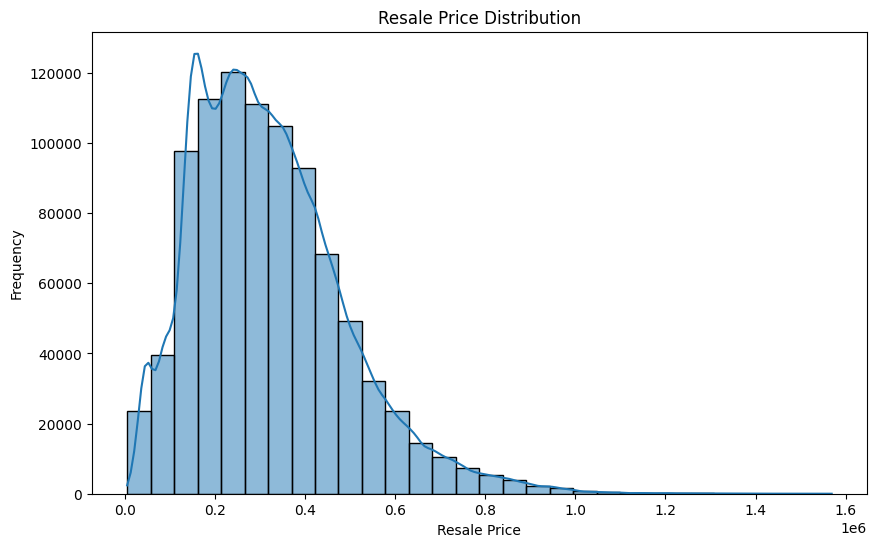

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame called df
# Bar Plot of Resale Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['resale_price'], bins=30, kde=True)
plt.title('Resale Price Distribution')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for missing values in 'town' and 'resale_price' columns
print("Missing values in 'town' column:", df['town'].isnull().sum())
print("Missing values in 'resale_price' column:", df['resale_price'].isnull().sum())

Missing values in 'town' column: 0
Missing values in 'resale_price' column: 0


In [ ]:
print(df.dtypes)

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
year                     int64
dtype: object


In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,9000.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04-06,31.0,IMPROVED,1977,6000.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,8000.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07-09,31.0,IMPROVED,1977,6000.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04-06,73.0,NEW GENERATION,1976,47200.0,1990


In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
year                   0
dtype: int64

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation
correlation_matrix = numerical_columns.corr()
# Display the correlation matrix
correlation_matrix

,month,floor_area_sqm,lease_commence_date,resale_price,year
month,1.000000,0.002858,0.004611,0.006465,-0.023486
floor_area_sqm,0.002858,1.000000,0.387282,0.564030,0.063098
lease_commence_date,0.004611,0.387282,1.000000,0.537226,0.430328
resale_price,0.006465,0.564030,0.537226,1.000000,0.672668
year,-0.023486,0.063098,0.430328,0.672668,1.000000


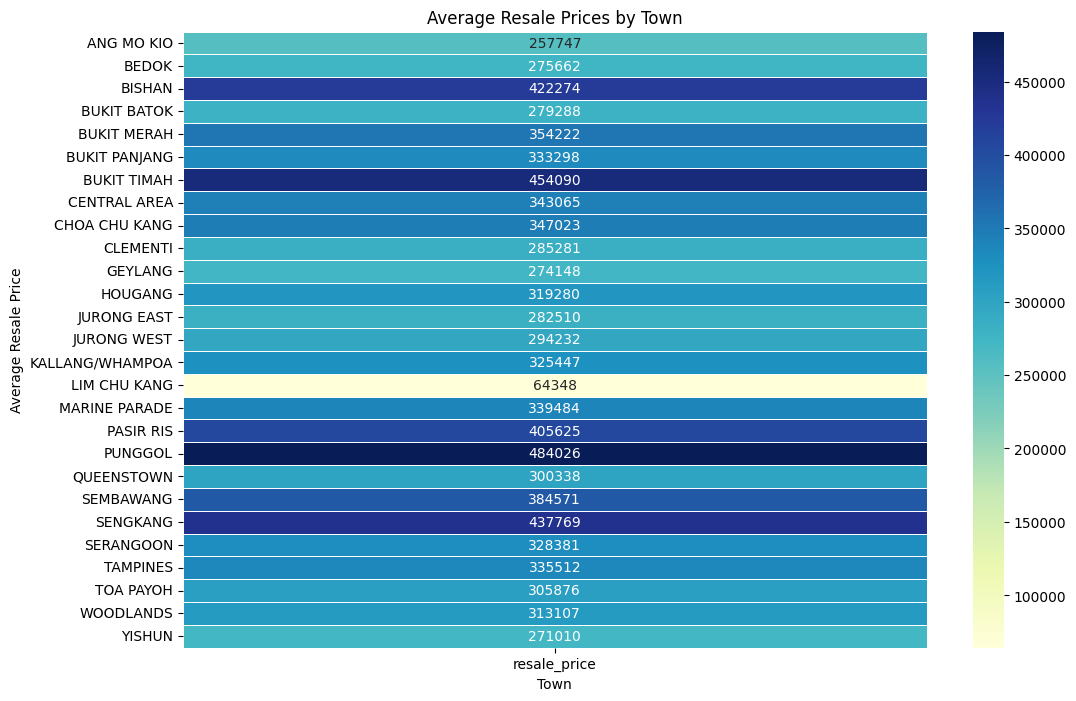

In [ ]:
# Heatmapof Resale Prices by Town
heatmap_data = df.groupby('town')['resale_price'].mean().reset_index()
heatmap_data = heatmap_data.pivot_table(index='town', columns=None, values='resale_price')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Average Resale Prices by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.show()

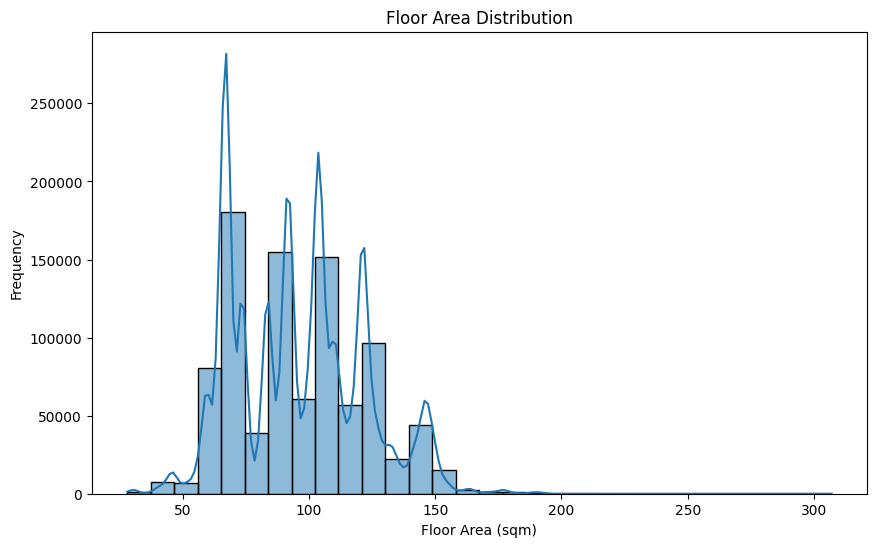

In [ ]:
# Histogram of Floor Area
plt.figure(figsize=(10, 6))
sns.histplot(df['floor_area_sqm'], bins=30, kde=True)
plt.title('Floor Area Distribution')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

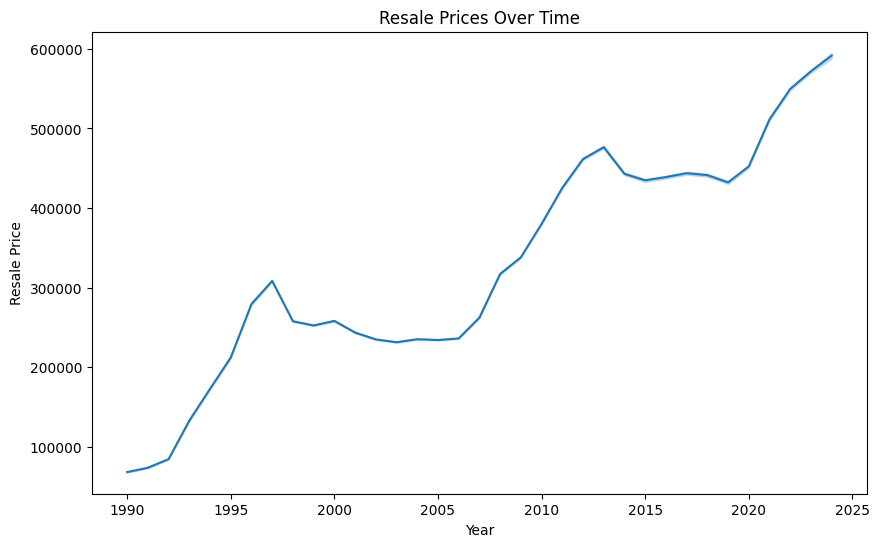

In [ ]:
# Line Plot of Resale Prices Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='resale_price')
plt.title('Resale Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

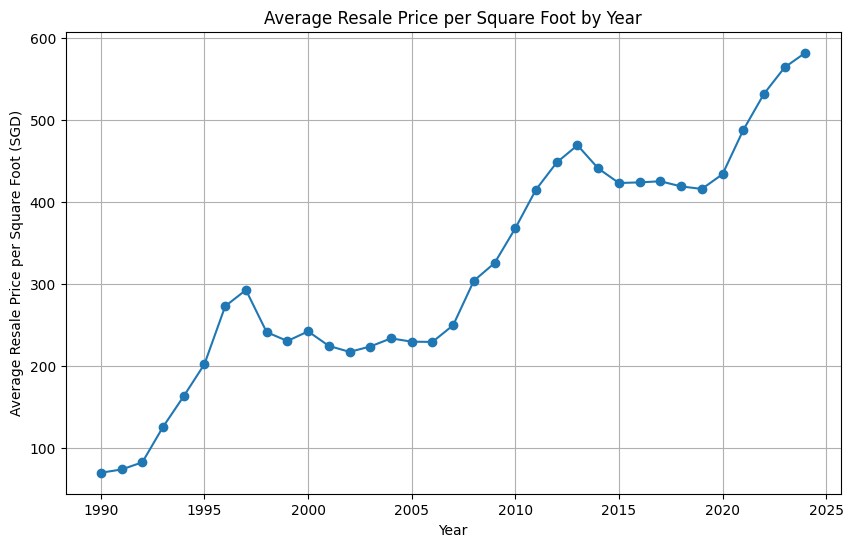

In [ ]:
# Convert floor area from square meters to square feet (1 sqm = 10.7639 sqft)
df['floor_area_sqft'] = df['floor_area_sqm'] * 10.7639

# Calculate the resale price per square foot
df['price_per_sqft'] = df['resale_price'] / df['floor_area_sqft']

# Group by year and calculate the average resale price per square foot
average_price_per_sqft_by_year = df.groupby('year')['price_per_sqft'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_sqft_by_year['year'], average_price_per_sqft_by_year['price_per_sqft'], marker='o')

plt.title('Average Resale Price per Square Foot by Year')
plt.xlabel('Year')
plt.ylabel('Average Resale Price per Square Foot (SGD)')
plt.grid(True)
plt.show()

# **NLP-Natural Language Preprocessing**

In [ ]:
import pickle

In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,floor_area_sqft,price_per_sqft
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,9000.0,1990,333.6809,26.971876
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04-06,31.0,IMPROVED,1977,6000.0,1990,333.6809,17.981251
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10-12,31.0,IMPROVED,1977,8000.0,1990,333.6809,23.975001
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07-09,31.0,IMPROVED,1977,6000.0,1990,333.6809,17.981251
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04-06,73.0,NEW GENERATION,1976,47200.0,1990,785.7647,60.068873


In [ ]:
df.to_csv('singaporedataset.csv')

## town

In [ ]:
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder for the target labels
le = LabelEncoder()
# Encode the categorical labels
town_encoder = le.fit(df['town'].unique())
df['town']=town_encoder.transform(df['town'])

pickle_=open("town_encoder.pkl","wb")
pickle.dump(town_encoder,pickle_)
pickle_.close()

In [ ]:
with open("/content/town_encoder.pkl", "rb") as pickle_file:
    town_encoder = pickle.load(pickle_file)

# Assuming you have new data in a DataFrame called 'new_data'
# Transform the 'town' column of the new data using the loaded encoder
print(town_encoder.transform(['WOODLANDS']))


[25]


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder for the target labels
le = LabelEncoder()
# Encode the categorical labels
town_encoder = le.fit(df['block'].unique())
df['block']=town_encoder.transform(df['block'])

pickle_=open("block_encoder.pkl","wb")
pickle.dump(town_encoder,pickle_)
pickle_.close()

In [ ]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Columns to encode
encode_cols = ['flat_type', 'street_name', 'storey_range', 'flat_model']

# Initialize LabelEncoder for the target labels
le_dict = {}

for col in encode_cols:
    # Initialize LabelEncoder
    le = LabelEncoder()
    # Fit LabelEncoder on unique values of the column and transform the column
    encoded_values = le.fit_transform(df[col])
    # Update DataFrame with encoded values
    df[col] = encoded_values
    # Save the LabelEncoder object for later use
    le_dict[col] = le

# Save the LabelEncoder objects using pickle
#for col, le in le_dict.items():
#    with open(col + '1_encoder.pkl', 'wb') as f:
#        pickle.dump(le, f)

In [ ]:
df.to_csv('singapore_encoded.csv')

In [ ]:
df.dtypes

month                    int64
town                     int64
flat_type                int64
block                    int64
street_name              int64
storey_range             int64
floor_area_sqm         float64
flat_model               int64
lease_commence_date      int64
resale_price           float64
year                     int64
floor_area_sqft        float64
price_per_sqft         float64
dtype: object

# Machine Learning

Seperating Independent and Dependent features

In [ ]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,floor_area_sqft,price_per_sqft
0,1,0,0,829,13,5,31.0,5,1977,9000.0,1990,333.6809,26.971876
1,1,0,0,829,13,2,31.0,5,1977,6000.0,1990,333.6809,17.981251


In [ ]:
x = df.drop(["resale_price", "floor_area_sqft", "price_per_sqft"], axis=1)
y = df["resale_price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=42)

Identifying algorithm/ model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics


In [ ]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()}


decisiontree Regressor accuracy score:  1.0 0.9999285237188593
RandomForestRegressor accuracy score:  0.999995644881032 0.9999652259069938
GradientBoostingRegressor accuracy score:  0.9976273928962961 0.9975596595934524
AdaBoostRegressor accuracy score:  0.8870127552814879 0.8865141154045756




---



# Identified Best Algorithm: Decisiontree Regressor

Evaluate with Cross-Validation:
Cross-validation helps ensure that the model's performance is consistent across different subsets of the data. It can provide a better estimate of how the model will perform on unseen data.

In [ ]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {'DecisionTree': model.decisiontree()}

decisiontree Regressor accuracy score:  0.999837555317505 0.9690140940396675


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Mean cross-validation R^2 score:", cv_scores.mean())


Cross-validation R^2 scores: [0.47469112 0.7827836  0.59184377 0.4849445  0.60946317]
Mean cross-validation R^2 score: 0.5887452304272968


Definition: R² score represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
- Interpretation:
R² score ranges from 0 to 1, where:
0 indicates that the model does not explain any variance in the target variable.
1 indicates that the model perfectly explains all the variance in the target variable.
- Higher R² scores indicate better model performance, with 1 being the ideal score.
- Mean Cross-Validation R² Score:
The mean of the R² scores obtained from cross-validation across different folds of the data.
- Provides an estimate of the model's generalization performance on unseen data.


---



## Overfitting:
- While a high R² score is desirable, it's important to ensure that your model is not overfitting the training data. You should also evaluate the model's performance on a separate test set to confirm its generalization ability.


---



In [ ]:
with open('singaporeResale_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('/content/singaporeResale_model.pkl','rb') as f:
  model1 = pickle.load(f)

In [ ]:
df.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,floor_area_sqft,price_per_sqft
0,1,0,0,829,13,5,31.0,5,1977,9000.0,1990,333.6809,26.971876


In [ ]:
x.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
0,1,0,0,829,13,5,31.0,5,1977,1990
1,1,0,0,829,13,2,31.0,5,1977,1990
2,1,0,0,829,13,5,31.0,5,1977,1990


In [ ]:
df.iloc[1]

month                     1.000000
town                      0.000000
flat_type                 0.000000
block                   829.000000
street_name              13.000000
storey_range              2.000000
floor_area_sqm           31.000000
flat_model                5.000000
lease_commence_date    1977.000000
resale_price           6000.000000
year                   1990.000000
floor_area_sqft         333.680900
price_per_sqft           17.981251
Name: 1, dtype: float64

In [ ]:
import numpy as np
y_pred = model1.predict(np.array([[1,0,0,829,13,2,31.0,5,1977,1990,333.6809,17.981251]]))
y_pred[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


6000.0